<a href="https://colab.research.google.com/github/ys-0205/-/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B3%BC%ED%95%99_06_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6장 데이터 시각화

##01 데이터 시각화란?

### 데이터 시각화의 필요성

In [ ]:
anscombe

x1,x2,x3,x4,y1,y2,y3,y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,8,7.24,6.13,6.08,5.25
4,4,4,19,4.26,3.10,5.39,12.50
12,12,12,8,10.84,9.13,8.15,5.56


In [ ]:
tb = apply(anscombe, 2, mean) # 평균
print(tb)

      x1       x2       x3       x4       y1       y2       y3       y4 
9.000000 9.000000 9.000000 9.000000 7.500909 7.500909 7.500000 7.500909 


In [ ]:
tb = apply(anscombe, 2, var) # 분산
print(tb)

       x1        x2        x3        x4        y1        y2        y3        y4 
11.000000 11.000000 11.000000 11.000000  4.127269  4.127629  4.122620  4.123249 


In [ ]:
# 상관관계(상관계수)
cor(anscombe$x1, anscombe$y1)
cor(anscombe$x2, anscombe$y2)
cor(anscombe$x3, anscombe$y3)
cor(anscombe$x4, anscombe$y4)

[1] 0.8164205

[1] 0.8162365

[1] 0.8162867

[1] 0.8165214

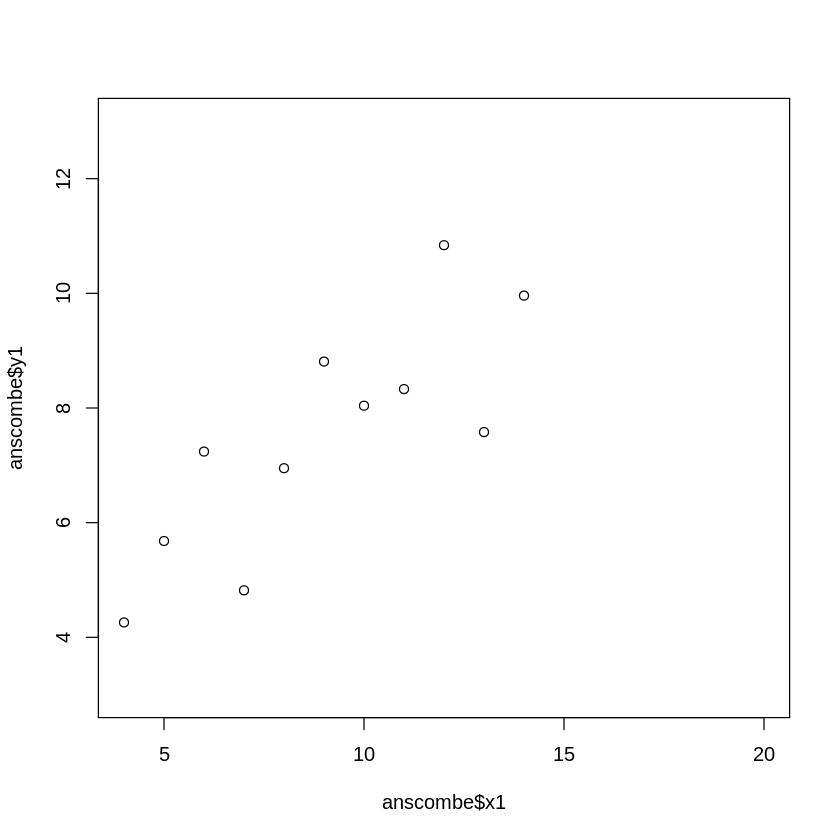

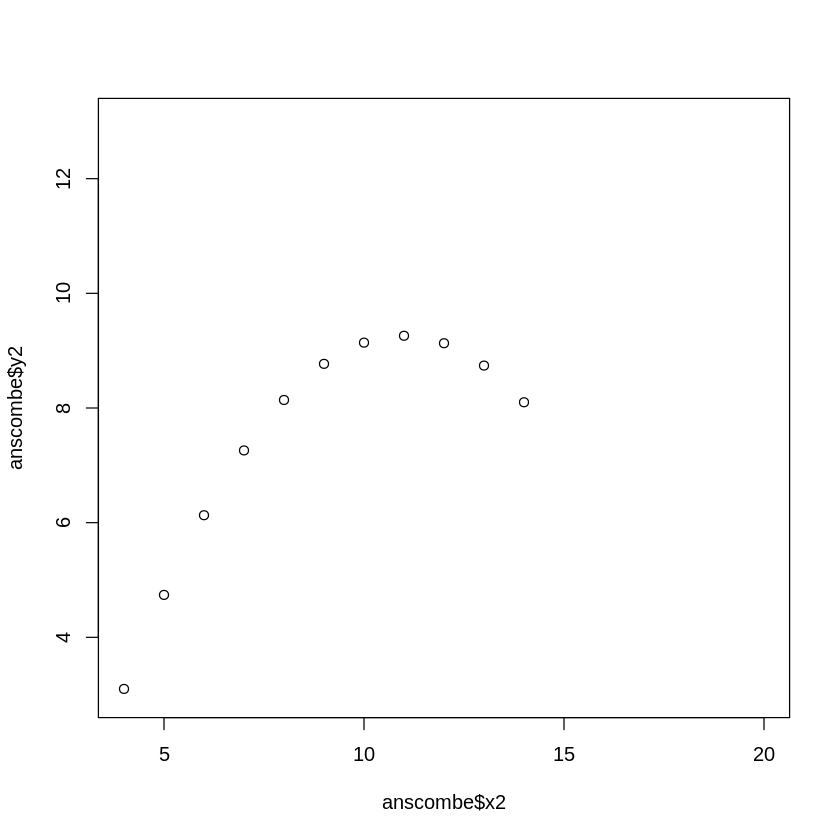

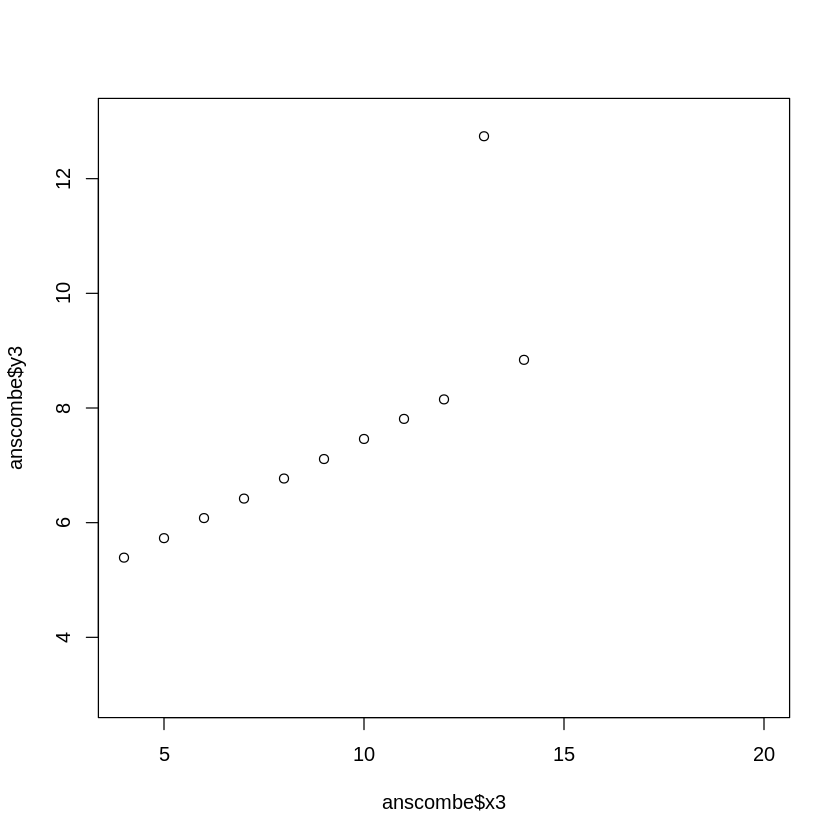

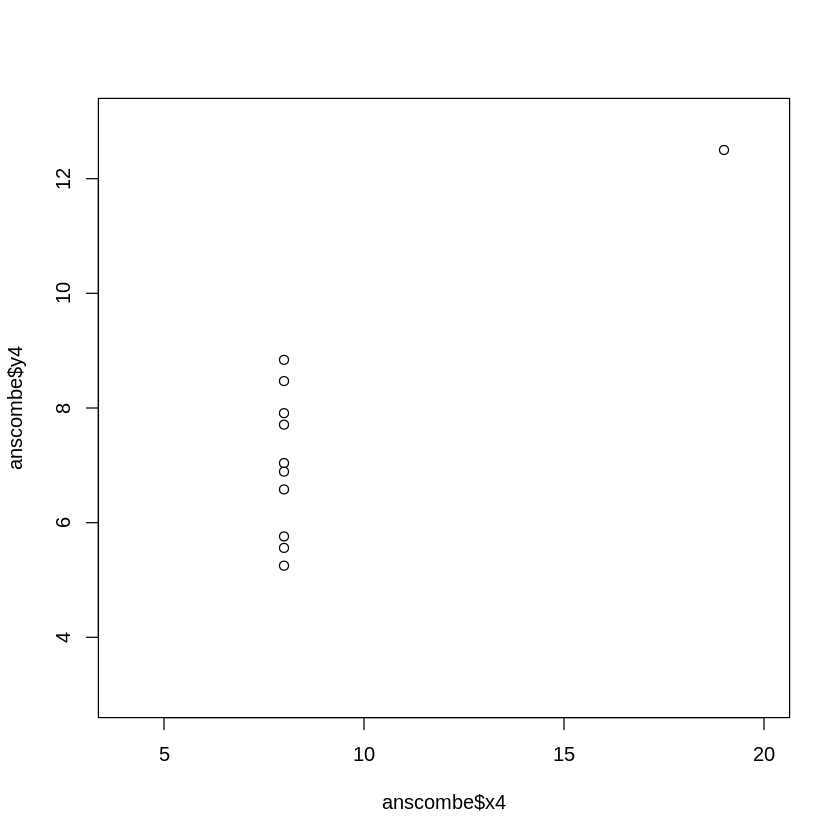

In [ ]:
plot(anscombe$x1, anscombe$y1, xlim = c(4, 20), ylim = c(3, 13))
plot(anscombe$x2, anscombe$y2, xlim = c(4, 20), ylim = c(3, 13))
plot(anscombe$x3, anscombe$y3, xlim = c(4, 20), ylim = c(3, 13))
plot(anscombe$x4, anscombe$y4, xlim = c(4, 20), ylim = c(3, 13))

###시각화의 기본 요소

In [ ]:
install.packages("gapminder")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(gapminder)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
y <- gapminder %>% group_by(year, continent) %>% summarize(c_pop = sum(pop))
head(y, 20)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,continent,c_pop
<int>,<fct>,<dbl>
1952,Africa,237640501
1952,Americas,345152446
1952,Asia,1395357351
1952,Europe,418120846
1952,Oceania,10686006
1957,Africa,264837738
1957,Americas,386953916
1957,Asia,1562780599
1957,Europe,437890351


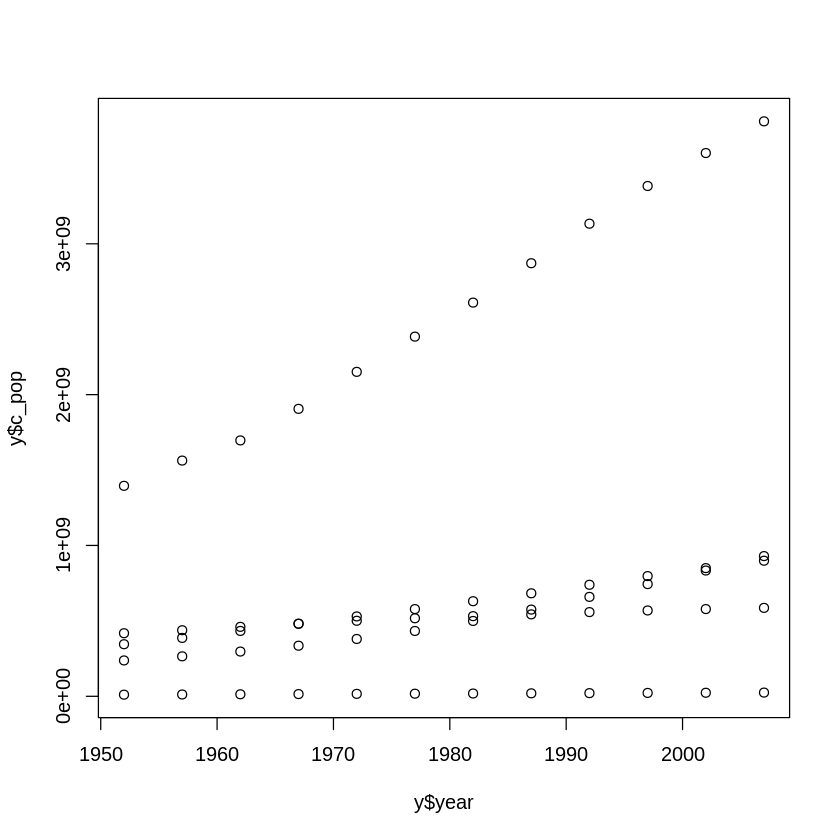

In [ ]:
plot(y$year, y$c_pop)

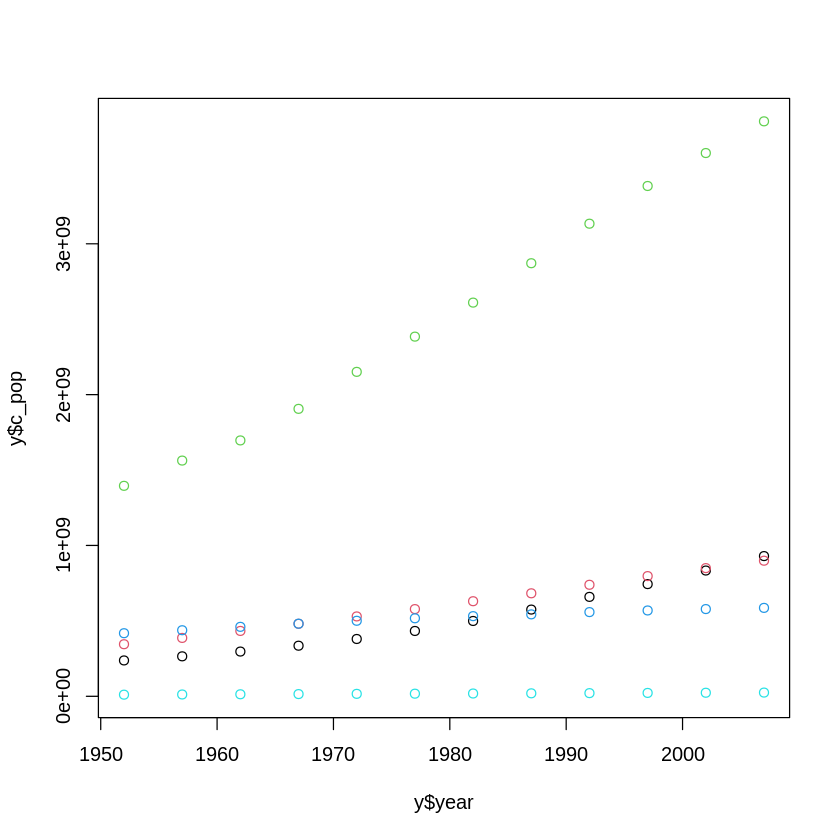

In [ ]:
plot(y$year, y$c_pop, col = y$continent)

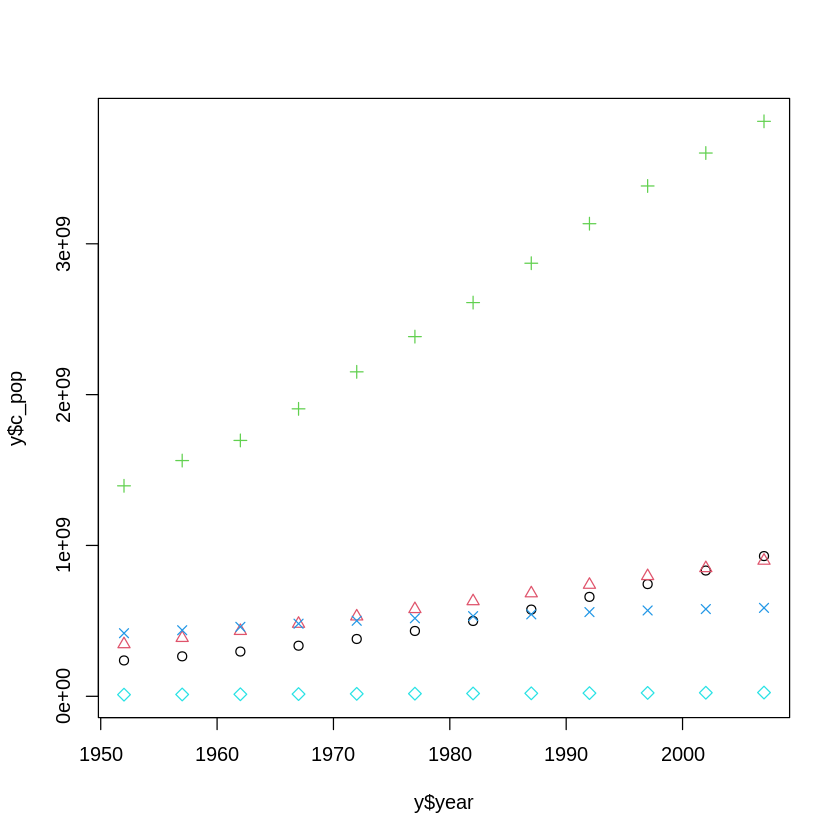

In [ ]:
plot(y$year, y$c_pop, col = y$continent, pch = c(1:5))

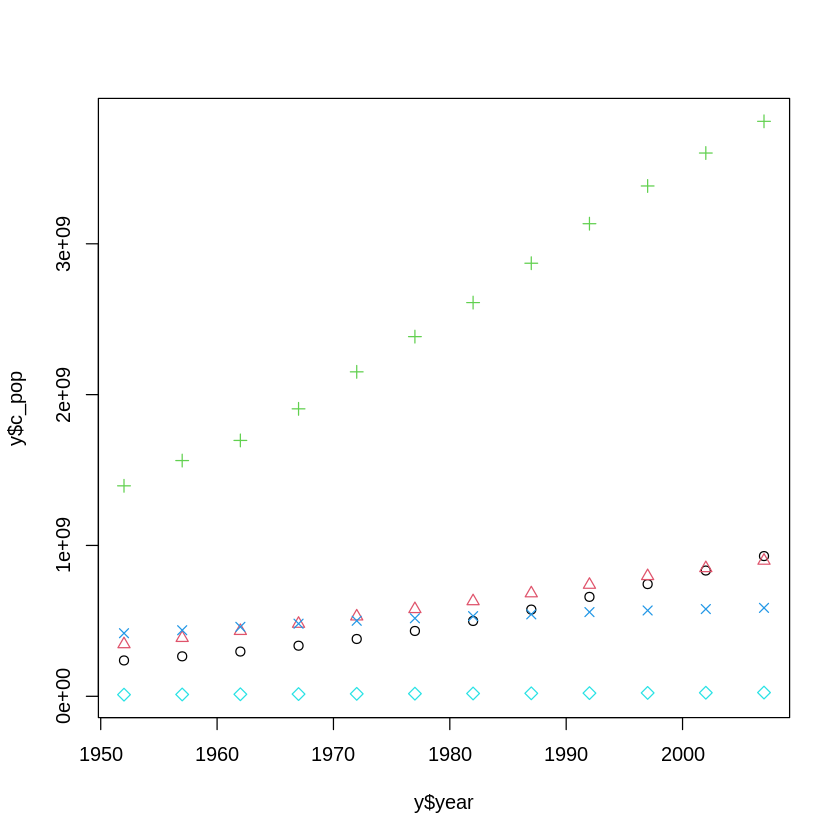

In [ ]:
plot(y$year, y$c_pop, col = y$continent, pch = c(1:length(levels(y$continent))))

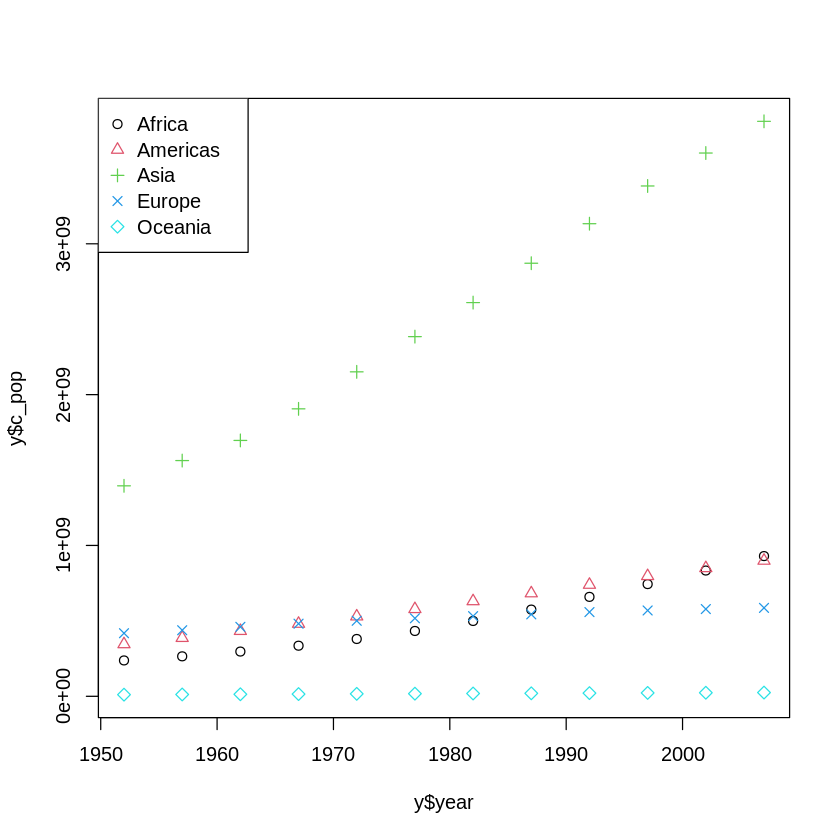

In [ ]:
plot(y$year, y$c_pop, col = y$continent, pch = c(1:length(levels(y$continent))))
# legend("topleft", legend = 5, pch = c(1:5), col = c(1:5)) # 아래와 같은 의미
legend("topleft", legend = levels((y$continent)), pch = c(1:length(levels(y$continent))), col = c(1:length(levels(y$continent))))

##02 시각화의 기본 기능

###1. 많은 양의 데이터를 효과적으로 관찰

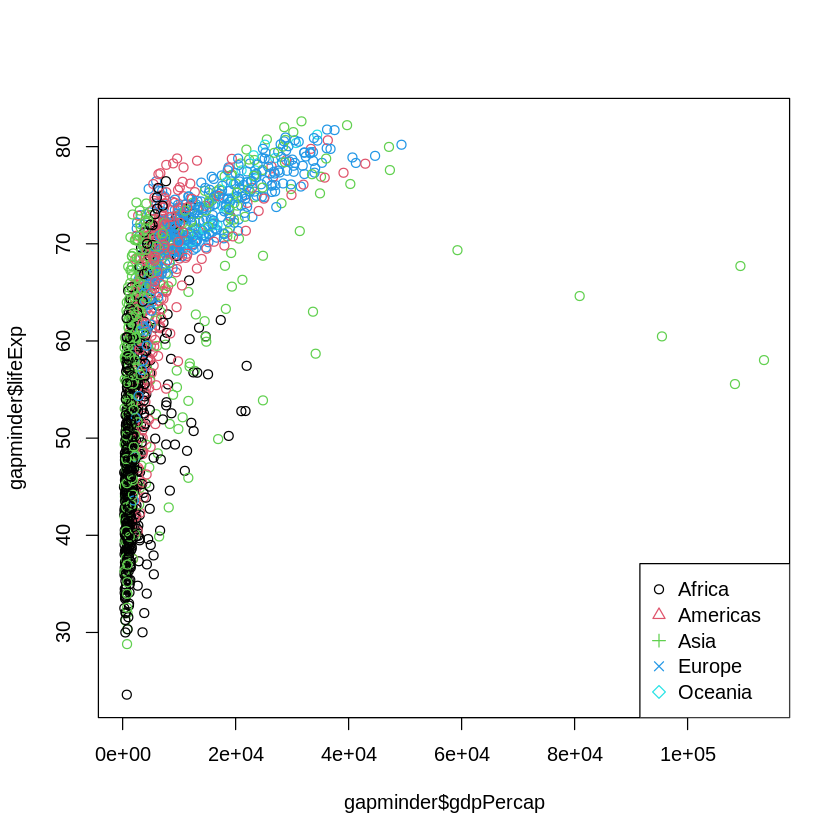

In [ ]:
plot(gapminder$gdpPercap, gapminder$lifeExp, col = gapminder$continent)
legend("bottomright", legend = levels((gapminder$continent)), pch = c(1:length(levels(gapminder$continent))), col = c(1:length(levels(y$continent))))

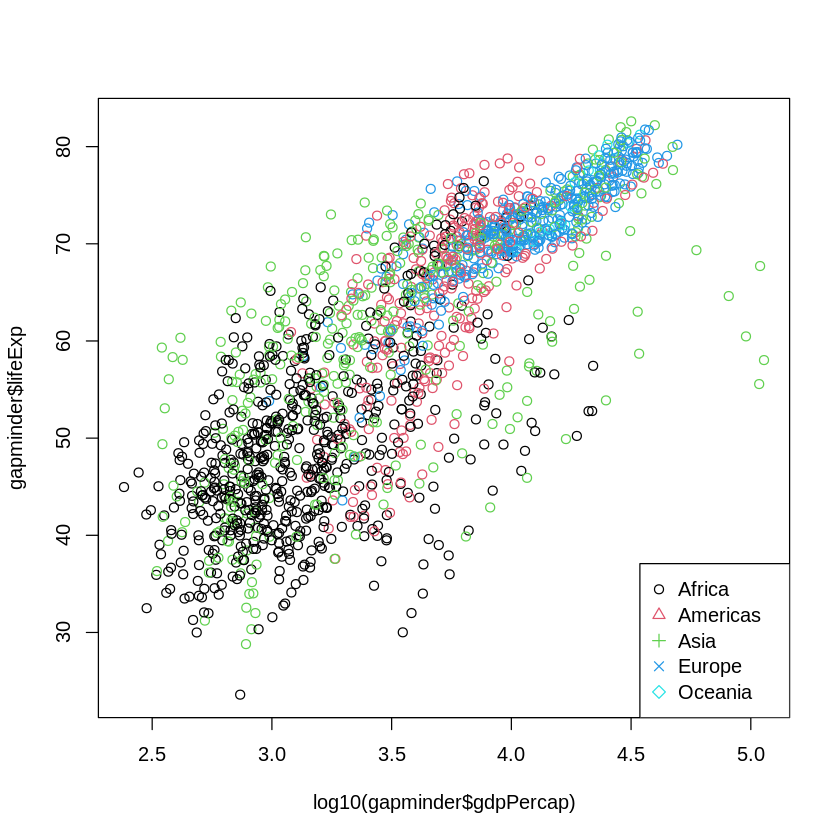

In [ ]:
plot(log10(gapminder$gdpPercap), gapminder$lifeExp, col = gapminder$continent)
legend("bottomright", legend  = levels((gapminder$continent)), pch = c(1:length(levels(gapminder$continent))), col = c(1:length(levels(y$continent))))

In [ ]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



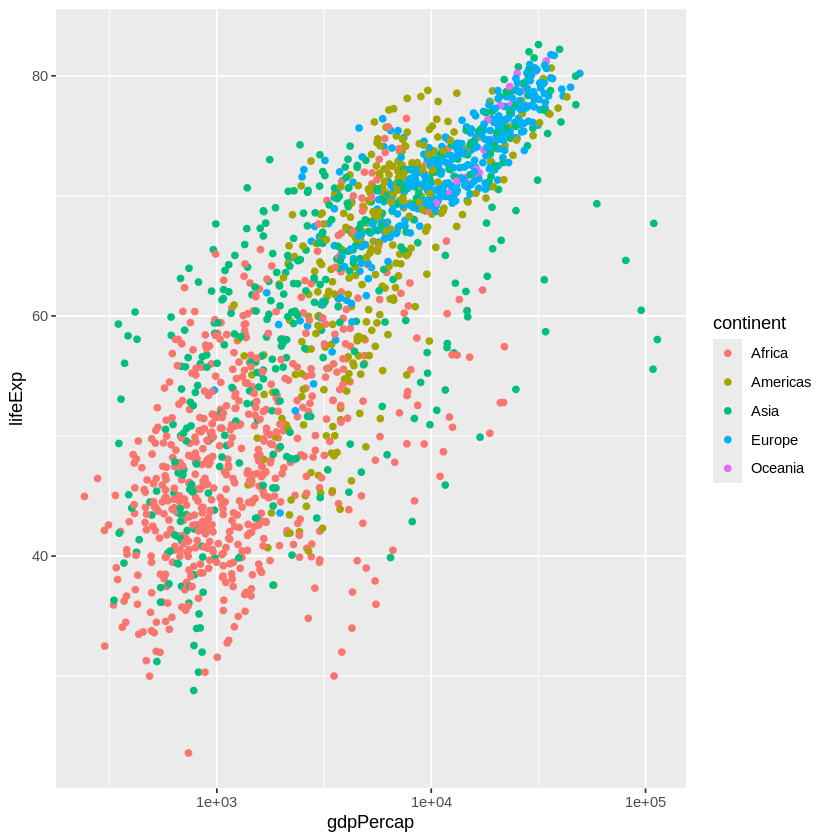

In [ ]:
ggplot(gapminder, aes(x =  gdpPercap, y = lifeExp, col = continent)) + geom_point() + scale_x_log10()

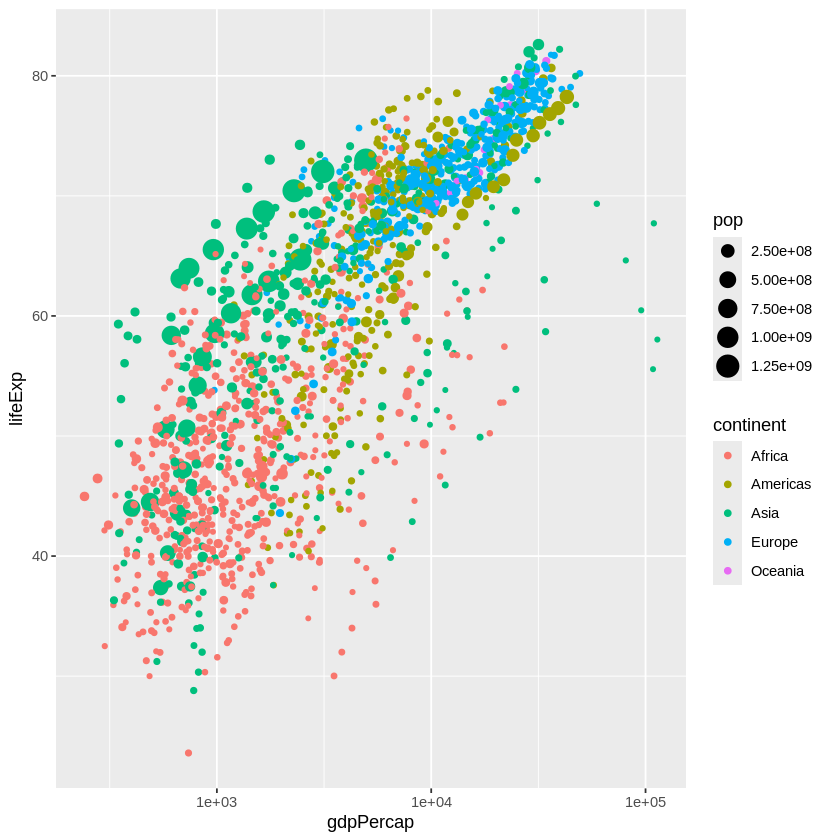

In [ ]:
ggplot(gapminder, aes(x =  gdpPercap, y = lifeExp, col = continent, size = pop)) + geom_point() + scale_x_log10()

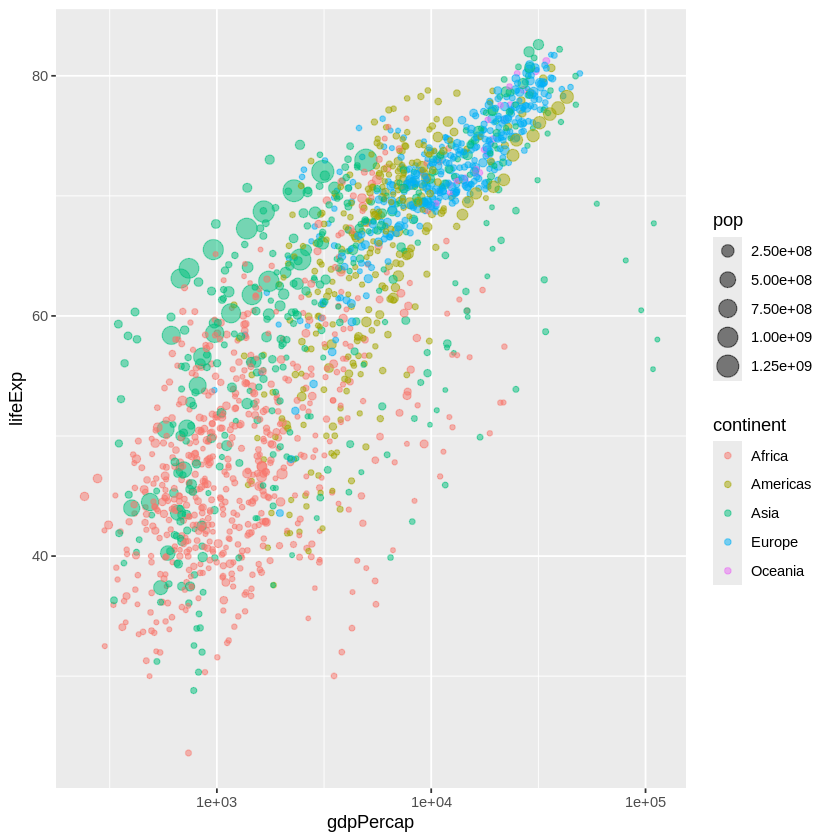

In [ ]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, col = continent, size = pop)) + geom_point(alpha = 0.5) + scale_x_log10()

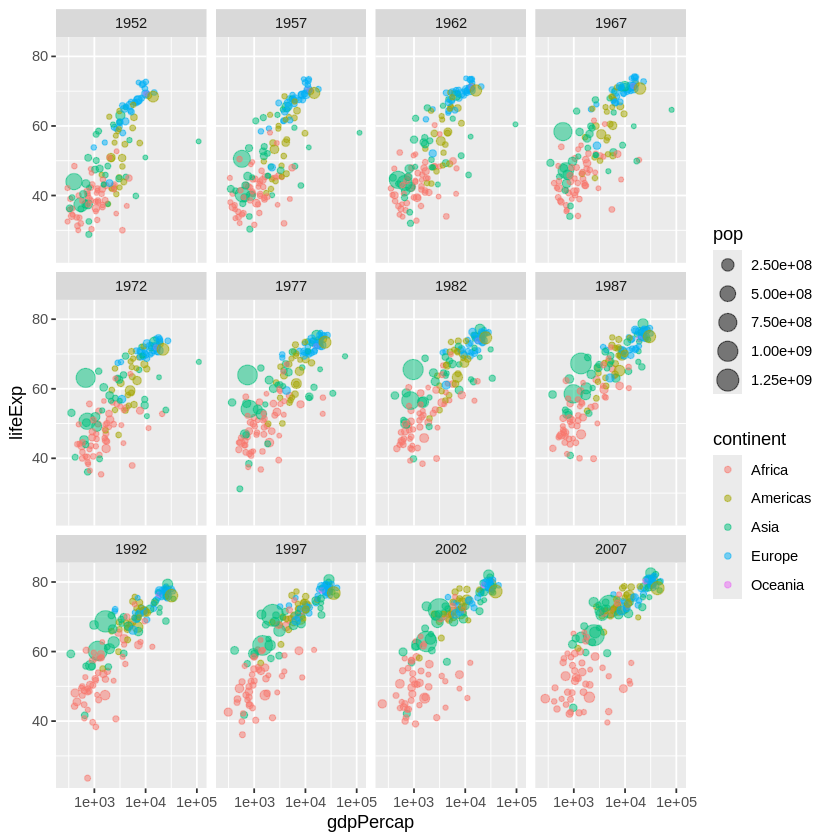

In [ ]:
ggplot(gapminder, aes(x=gdpPercap, y=lifeExp, col=continent, size=pop)) + geom_point(alpha=0.5) + scale_x_log10() + facet_wrap(~year)

###2.데이터를 여러 관점에서 보게 함

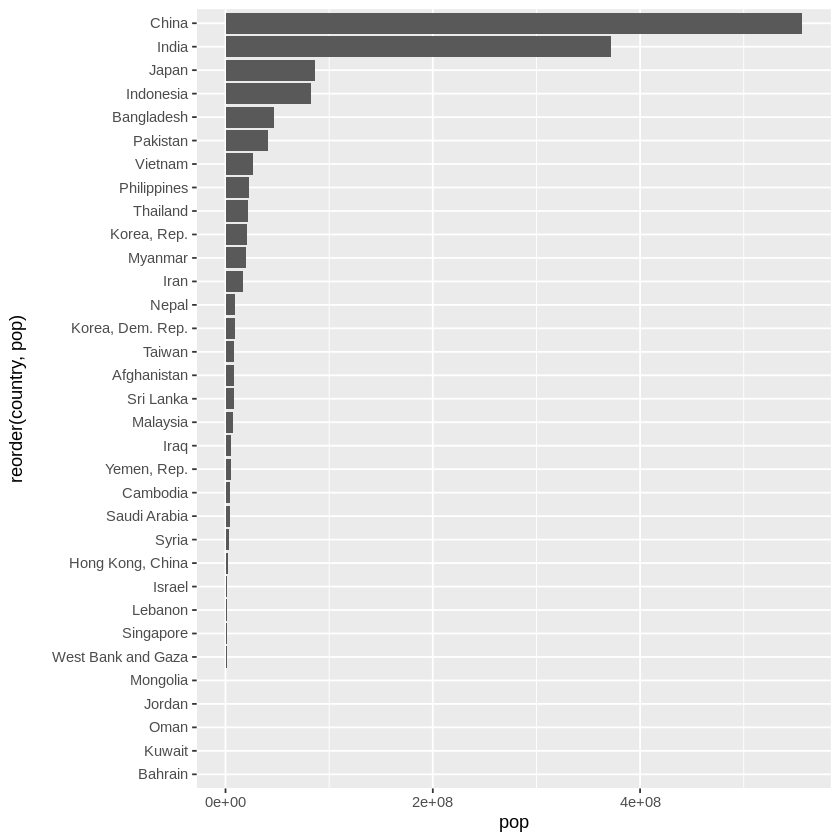

In [ ]:
gapminder %>% filter(year == 1952 & continent =="Asia") %>% ggplot(aes(reorder(country, pop), pop)) + geom_bar(stat = "identity") + coord_flip()

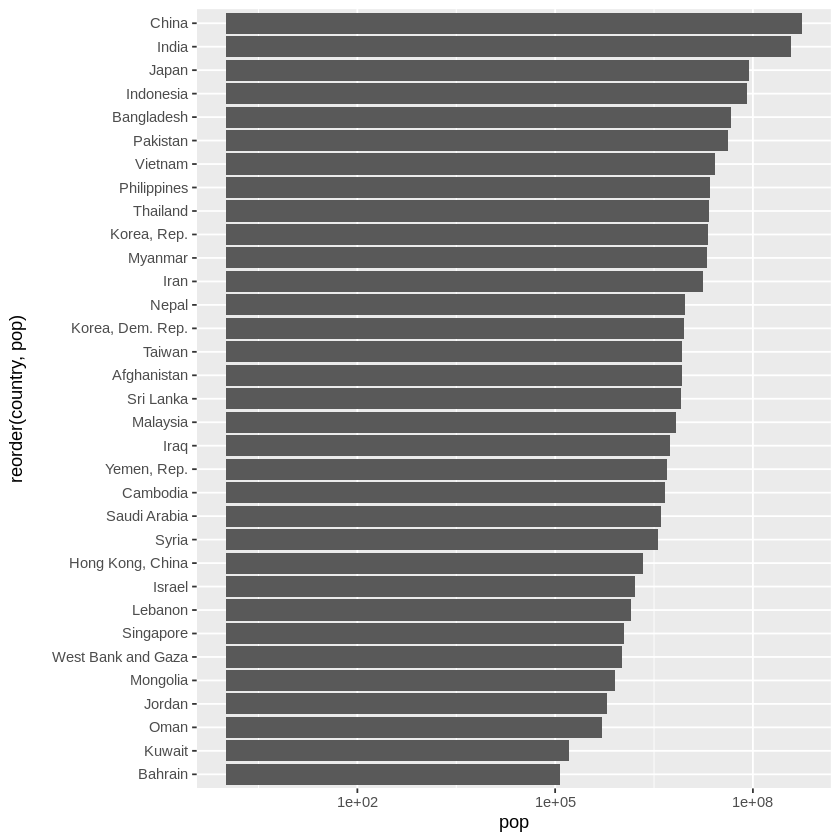

In [ ]:
gapminder %>% filter(year==1952 & continent== "Asia") %>% ggplot(aes(reorder(country, pop), pop)) + geom_bar(stat  = "identity") + scale_y_log10() + coord_flip()

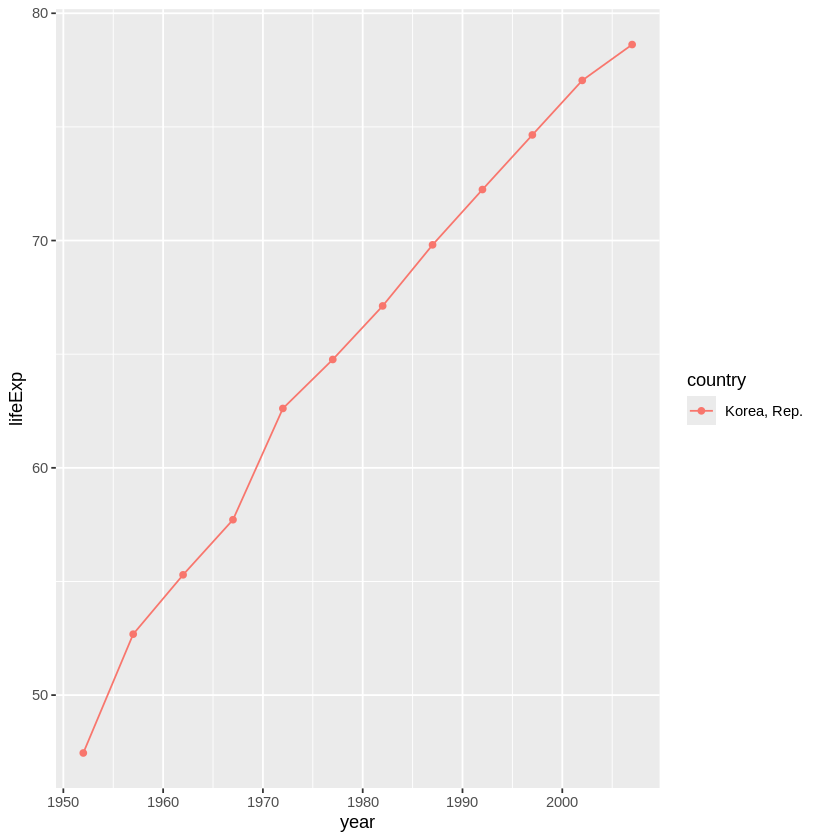

In [ ]:
gapminder %>% filter(country == "Korea, Rep.") %>% ggplot(aes(year, lifeExp, col = country)) + geom_point() + geom_line()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


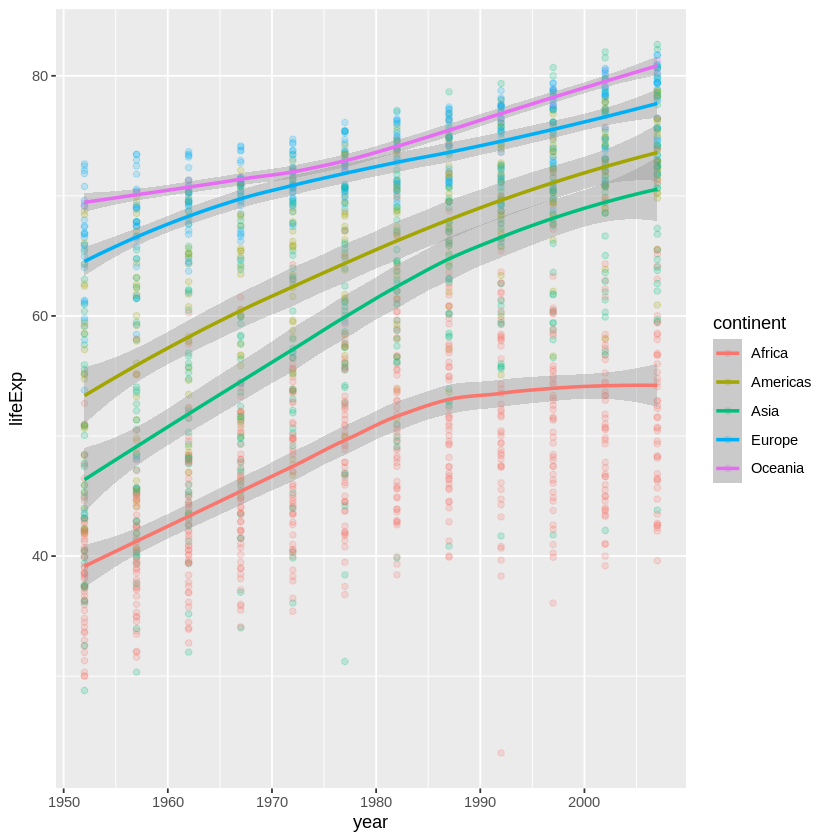

In [ ]:
gapminder %>% ggplot(aes(x = year, y = lifeExp, col = continent)) + geom_point(alpha = 0.2) + geom_smooth()

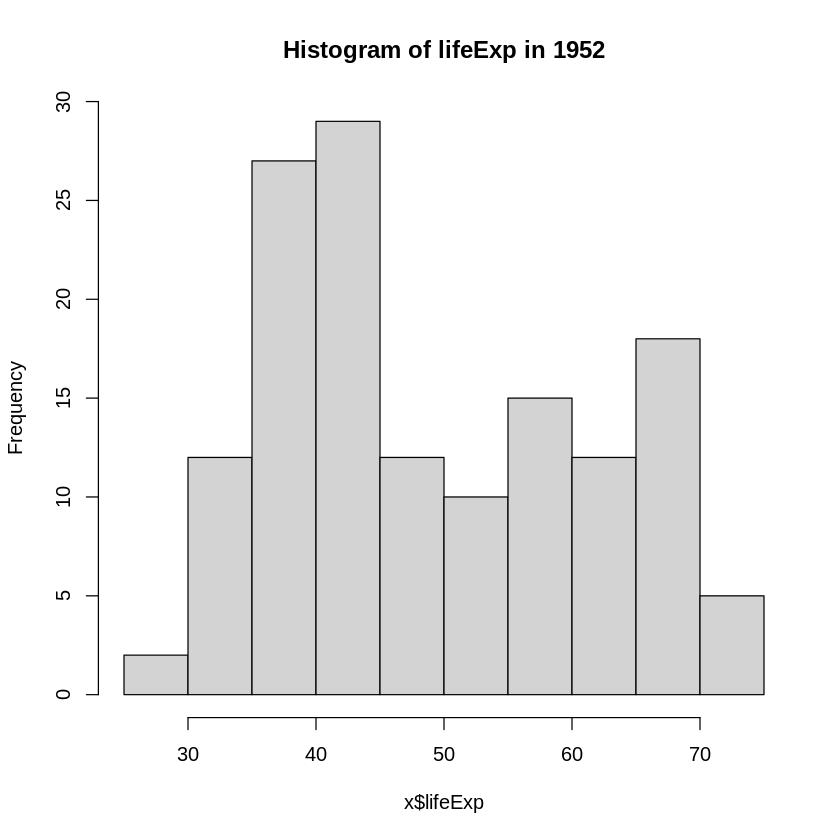

In [ ]:
x = filter(gapminder, year == 1952)
hist(x$lifeExp, main = "Histogram of lifeExp in 1952")

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


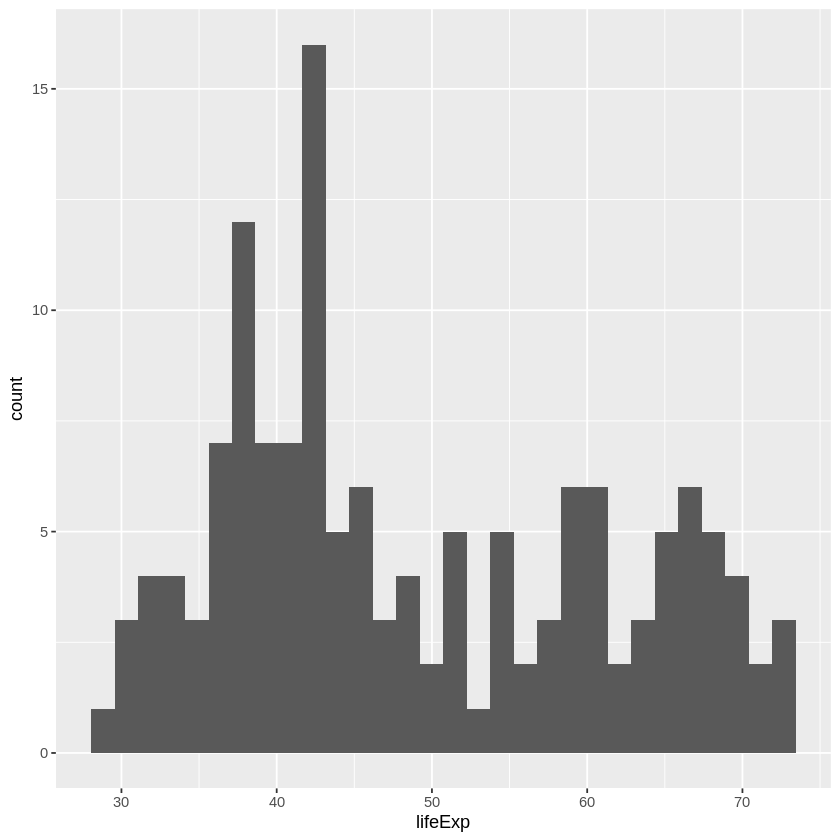

In [ ]:
x %>% ggplot(aes(lifeExp)) + geom_histogram()

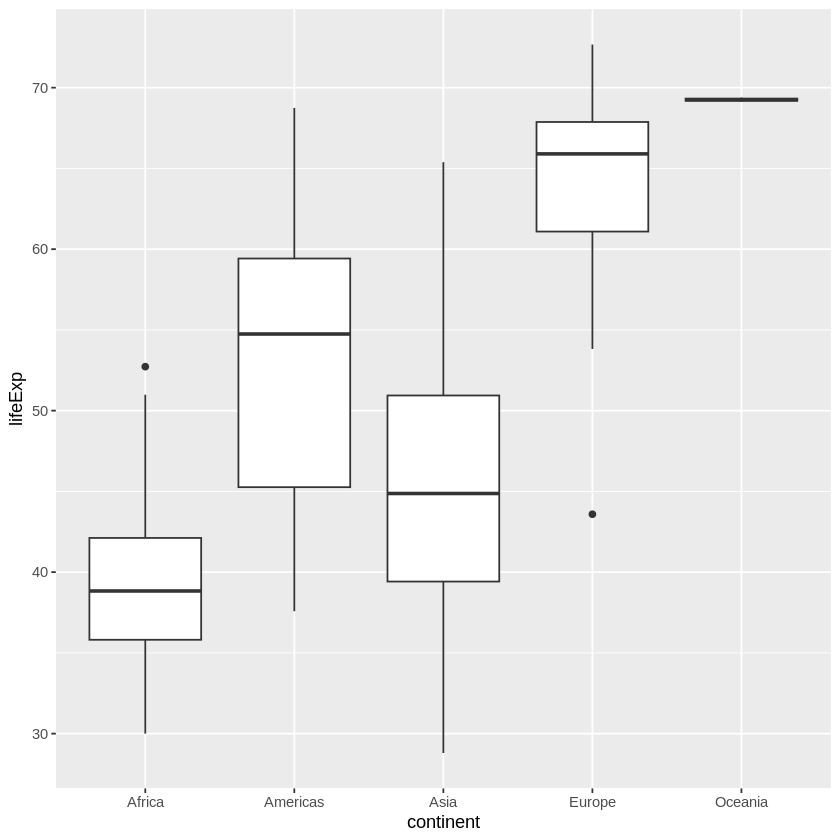

In [ ]:
x %>% ggplot(aes(continent, lifeExp)) + geom_boxplot()

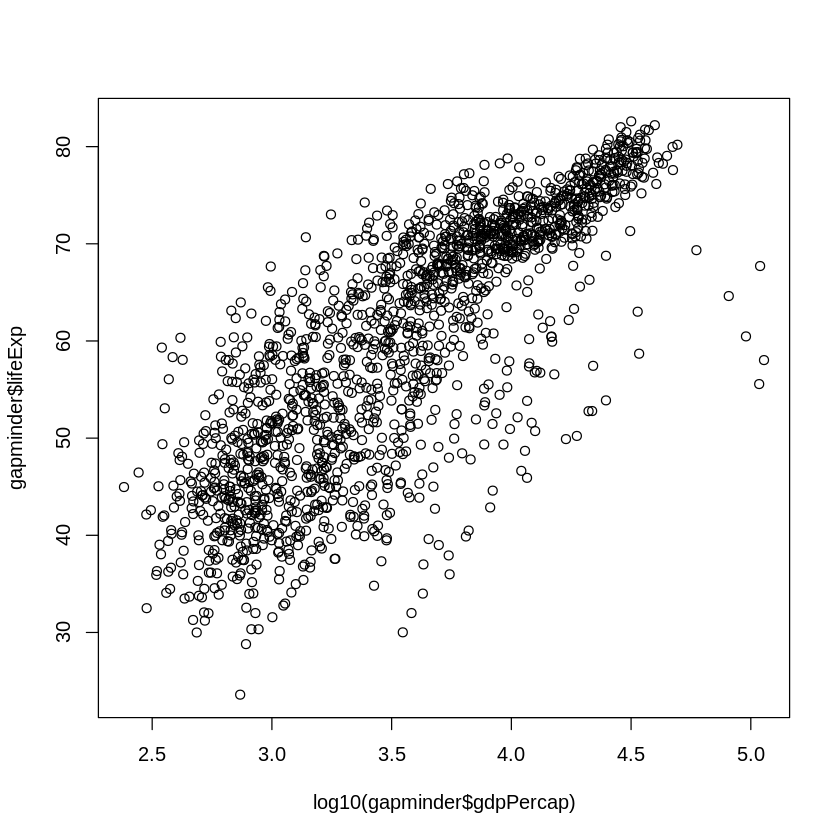

In [ ]:
plot(log10(gapminder$gdpPercap), gapminder$lifeExp)